<a href="https://colab.research.google.com/github/hwon820/Python_DataAnalysis/blob/main/chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#쇼핑몰 사이트의 상품 주문 수 추세

###001. Data Load

*   **read_csv('파일명')** -> csv파일 load
*   **.head()** -> 처음 5행 표시
    - **head(k)** -> 처음 k개 표시




In [ ]:
import pandas as pd

#customer_master: 고객의 전반적인 정보
customer_master = pd.read_csv("customer_master.csv")
customer_master.head()

#customer_id: 고객 ID
#customer_name: 고객 이름
#registration_date: 등록 날짜
#email: 이메일 주소
#gender: 성별
#age: 나이
#birth: 생년월일
#pref: 거주지역

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [ ]:
#취급 상품 관련 정보
item_master = pd.read_csv('item_master.csv')
item_master.head()

#item_id: 상품 ID
#item_name: 상품명
#item_price: 가격

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [ ]:
#구매내역 데이터1
transaction_1 = pd.read_csv('transaction_1.csv')
transaction_1.head()

#transaction_id: 거래 ID
#price: 가격
#payment_date: 결제 날짜
#customer_id: 고객(구매자) ID

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [ ]:
#구매내역 데이터2
transaction_2 = pd.read_csv('transaction_2.csv')
transaction_2.head()

#두 구매내역 데이터는 동일한 column을 가짐 -> 열 방향 병합 

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [ ]:
#구매내역 세부 데이터1
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_1.head()

#detail_id: 세부 ID
#transaction_id: 거래 ID
#item_id: 상품 ID
#quantity: 거래 수량

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [ ]:
#구매내역 세부 데이터2
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


###002. Data Union


*   **pd.concat( ['data1', 'data2'], ignore_index = True)** -> 동일한 형태의 dataframe 결합
    - **ignore_index:** False로 하면 기존의 index 끌고 옴
    - **axis:** 1로 설정하면 행 방향으로 결합. Default는 0

*   항목 추가



In [ ]:
#구매내역 데이터 결합
transaction = pd.concat([transaction_1, transaction_2], ignore_index = True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [ ]:
print('transaction_1 개수:', len(transaction_1))
print('transaction_2 개수:', len(transaction_2))
print('transaction 개수:', len(transaction))

transaction_1 개수: 5000
transaction_2 개수: 1786
transaction 개수: 6786


In [ ]:
#구매내역 세부 데이터 결합
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index = True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [ ]:
print('transaction_1 개수:', len(transaction_detail_1))
print('transaction_2 개수:', len(transaction_detail_2))
print('transaction 개수:', len(transaction_detail))

transaction_1 개수: 5000
transaction_2 개수: 2144
transaction 개수: 7144


>주문 수(매출)과 밀접한 관련이 있는 data를 중심으로 데이터 결합 -> transcation & transaction_detail

###003. 매출 데이터끼리 Join

>***Check Point***
* **기준 데이터** -> 더 상세한 정보를 담은 데이터로 설정: transaction_detail
*   **추가할 Data Column(변수):** transaction의 payment_date, customer_id
    - transaction의 price -> transaction_detail의 quatity와 item_master의 item_price로 계산됨.
    중복계산을 피하기 위해 따로 추가X
*  **공통되는 Data Column**: transaction_id



*   **pd.merge(기준 데이터, 추가데이터명[ ['추가 변수1', '추가 변수2', '추가 변수3'] ], on = 'Join Key 변수', how = 'Join 종류')** -> Key를 기준으로 dataframe 병합


In [ ]:
join_data = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']], on = 'transaction_id', how = 'left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


> ***concat vs merge vs join***
*   concat: dataframe을 물리적으로 이어붙임
*   merge: 두 dataframe을 key(고유값) 기준으로 병합
  - default: pd.merge(df_left, df_right, on=None, how='inner')



###004. 마스터데이터 Join

In [ ]:
#공통 Column인 customer_id / item_id을 기준으로 데이터 결합
join_data = pd.merge(join_data, customer_master, on = 'customer_id', how = 'left')
join_data = pd.merge(join_data, item_master, on = 'item_id', how = 'left')
join_data.head()

#6개의 data를 하나의 dataframe으로 결합 완료
#삭제 됐던 price 추가 필요

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


###005. 필요한 Data Column 추가

In [ ]:
#price = quantity * item_price
join_data['price'] = join_data['quantity'] * join_data['item_price']
join_data[['quantity', 'item_price', 'price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


###006. 데이터 가공 후 검산

In [ ]:
print('가공 전:', transaction['price'].sum())
print('가공 후:', join_data['price'].sum())

#가공 전 price와 가공 후 price 일치

가공 전: 971135000
가공 후: 971135000


In [ ]:
transaction['price'].sum() == join_data['price'].sum()

True

###007. 각종 통계랑 파악



*   i**snull()** -> 결측치 여부
    - **isnull().sum()** -> column별 결측치 개수
*   **.describe()** -> 각종 통계량 출력
    : 개수, 평균값, 표준편차, 최솟값, 사분위수(25%, 75%), 중앙값, 최댓값




In [ ]:
join_data.isnull()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7140,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7141,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7142,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [ ]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [ ]:
#column별 통계량 따로 출력 가능
print(join_data['item_price'].min())
join_data['item_price'].describe()

50000


count      7144.000000
mean     121698.628219
std       64571.311830
min       50000.000000
25%       50000.000000
50%      102500.000000
75%      187500.000000
max      210000.000000
Name: item_price, dtype: float64

###008. 월별 데이터 집계

> 효율적인 시계열 변화 분석을 위해 데이터 범위 축소 



*   **.dtypes** -> 자료형 확인
* **pd.to_datetime(데이터명['시계열변수명'])** -> datetime 형식으로 변경(Y-M-D H:Min:Sec)
*   **.dt** -> 판다스 내장 datetime 함수 
    - **.dt.strftime()** -> 형식 formating
      - '%Y%m' -> 201108
      - '%Y/%m' -> 2011/08




In [ ]:
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])
join_data['payment_month'] = join_data['payment_date'].dt.strftime('%Y%m')
join_data[['payment_date', 'payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [ ]:
print(join_data['payment_date'].dtype)
print(join_data['payment_month'].dtype)

datetime64[ns]
object


*   **groupby('기준변수명').집계방법()['표시할변수명']** 

In [ ]:
#월별 매출 집계
join_data.groupby('payment_month').sum()["price"]

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

###009. 월별, 상품별 데이터 집계

In [ ]:
#출력할 column이 여러개일 경우 list형태로 지정
join_data.groupby(['payment_month', 'item_name']).sum()[['price', 'quantity']]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341



*   **pd.pivot_table(데이터명, index = '행 변수명', colums = '열 변수명', values = '집계할 변수명', aggfunc = '집계방법')**



In [ ]:
pd.pivot_table(join_data, index = 'item_name', columns = 'payment_month', values = ['price', 'quantity'], aggfunc = 'sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

###010. 시각화

In [ ]:
graph_data = pd.pivot_table(join_data, index = 'payment_month', columns = 'item_name', values = 'price', aggfunc = 'sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


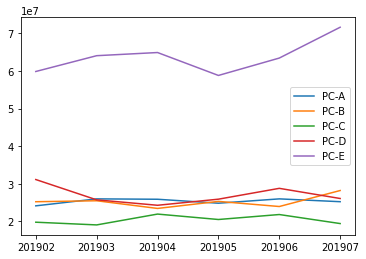

In [ ]:
import matplotlib.pyplot as plt

# jupyter notebook을 실행한 브라우저에서 바로 그림을 볼수 있게
# 즉, 브라우저 내부(inline) 에 바로 그려지도록 해주는 코드
%matplotlib inline

plt.plot(list(graph_data.index), graph_data["PC-A"], label = 'PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label = 'PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label = 'PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label = 'PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label = 'PC-E')

#그래프 내에 범례 표시
plt.legend()